In [36]:
import pandas as pd

data=pd.read_csv(r"C:\Users\LENOVO\Downloads\cirrhosis.csv")

In [37]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [38]:
data['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [39]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'D' else 0)


In [40]:
data['Status'].value_counts()

Status
0    257
1    161
Name: count, dtype: int64

In [41]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
label_cols = ['Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int64  
 3   Drug           418 non-null    int32  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int32  
 6   Ascites        418 non-null    int32  
 7   Hepatomegaly   418 non-null    int32  
 8   Spiders        418 non-null    int32  
 9   Edema          418 non-null    int32  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [44]:
df_encoded.drop('ID',axis=1,inplace=True)

In [45]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import pandas as pd

# Assume your DataFrame is named 'data' and all columns are numeric
imputer = IterativeImputer(random_state=42)

# Apply MICE imputation directly
imputed_data = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Round specific columns if they should be integers
imputed_data['Stage'] = imputed_data['Stage'].round().astype('Int64')
imputed_data['Platelets'] = imputed_data['Platelets'].round().astype('Int64')



In [46]:
imputed_data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [47]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    float64
 1   Status         418 non-null    float64
 2   Drug           418 non-null    float64
 3   Age            418 non-null    float64
 4   Sex            418 non-null    float64
 5   Ascites        418 non-null    float64
 6   Hepatomegaly   418 non-null    float64
 7   Spiders        418 non-null    float64
 8   Edema          418 non-null    float64
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    Int64  
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [48]:
imputed_data['Platelets'] = imputed_data['Platelets'].astype('int64')
imputed_data['Stage'] = imputed_data['Stage'].astype('int64')


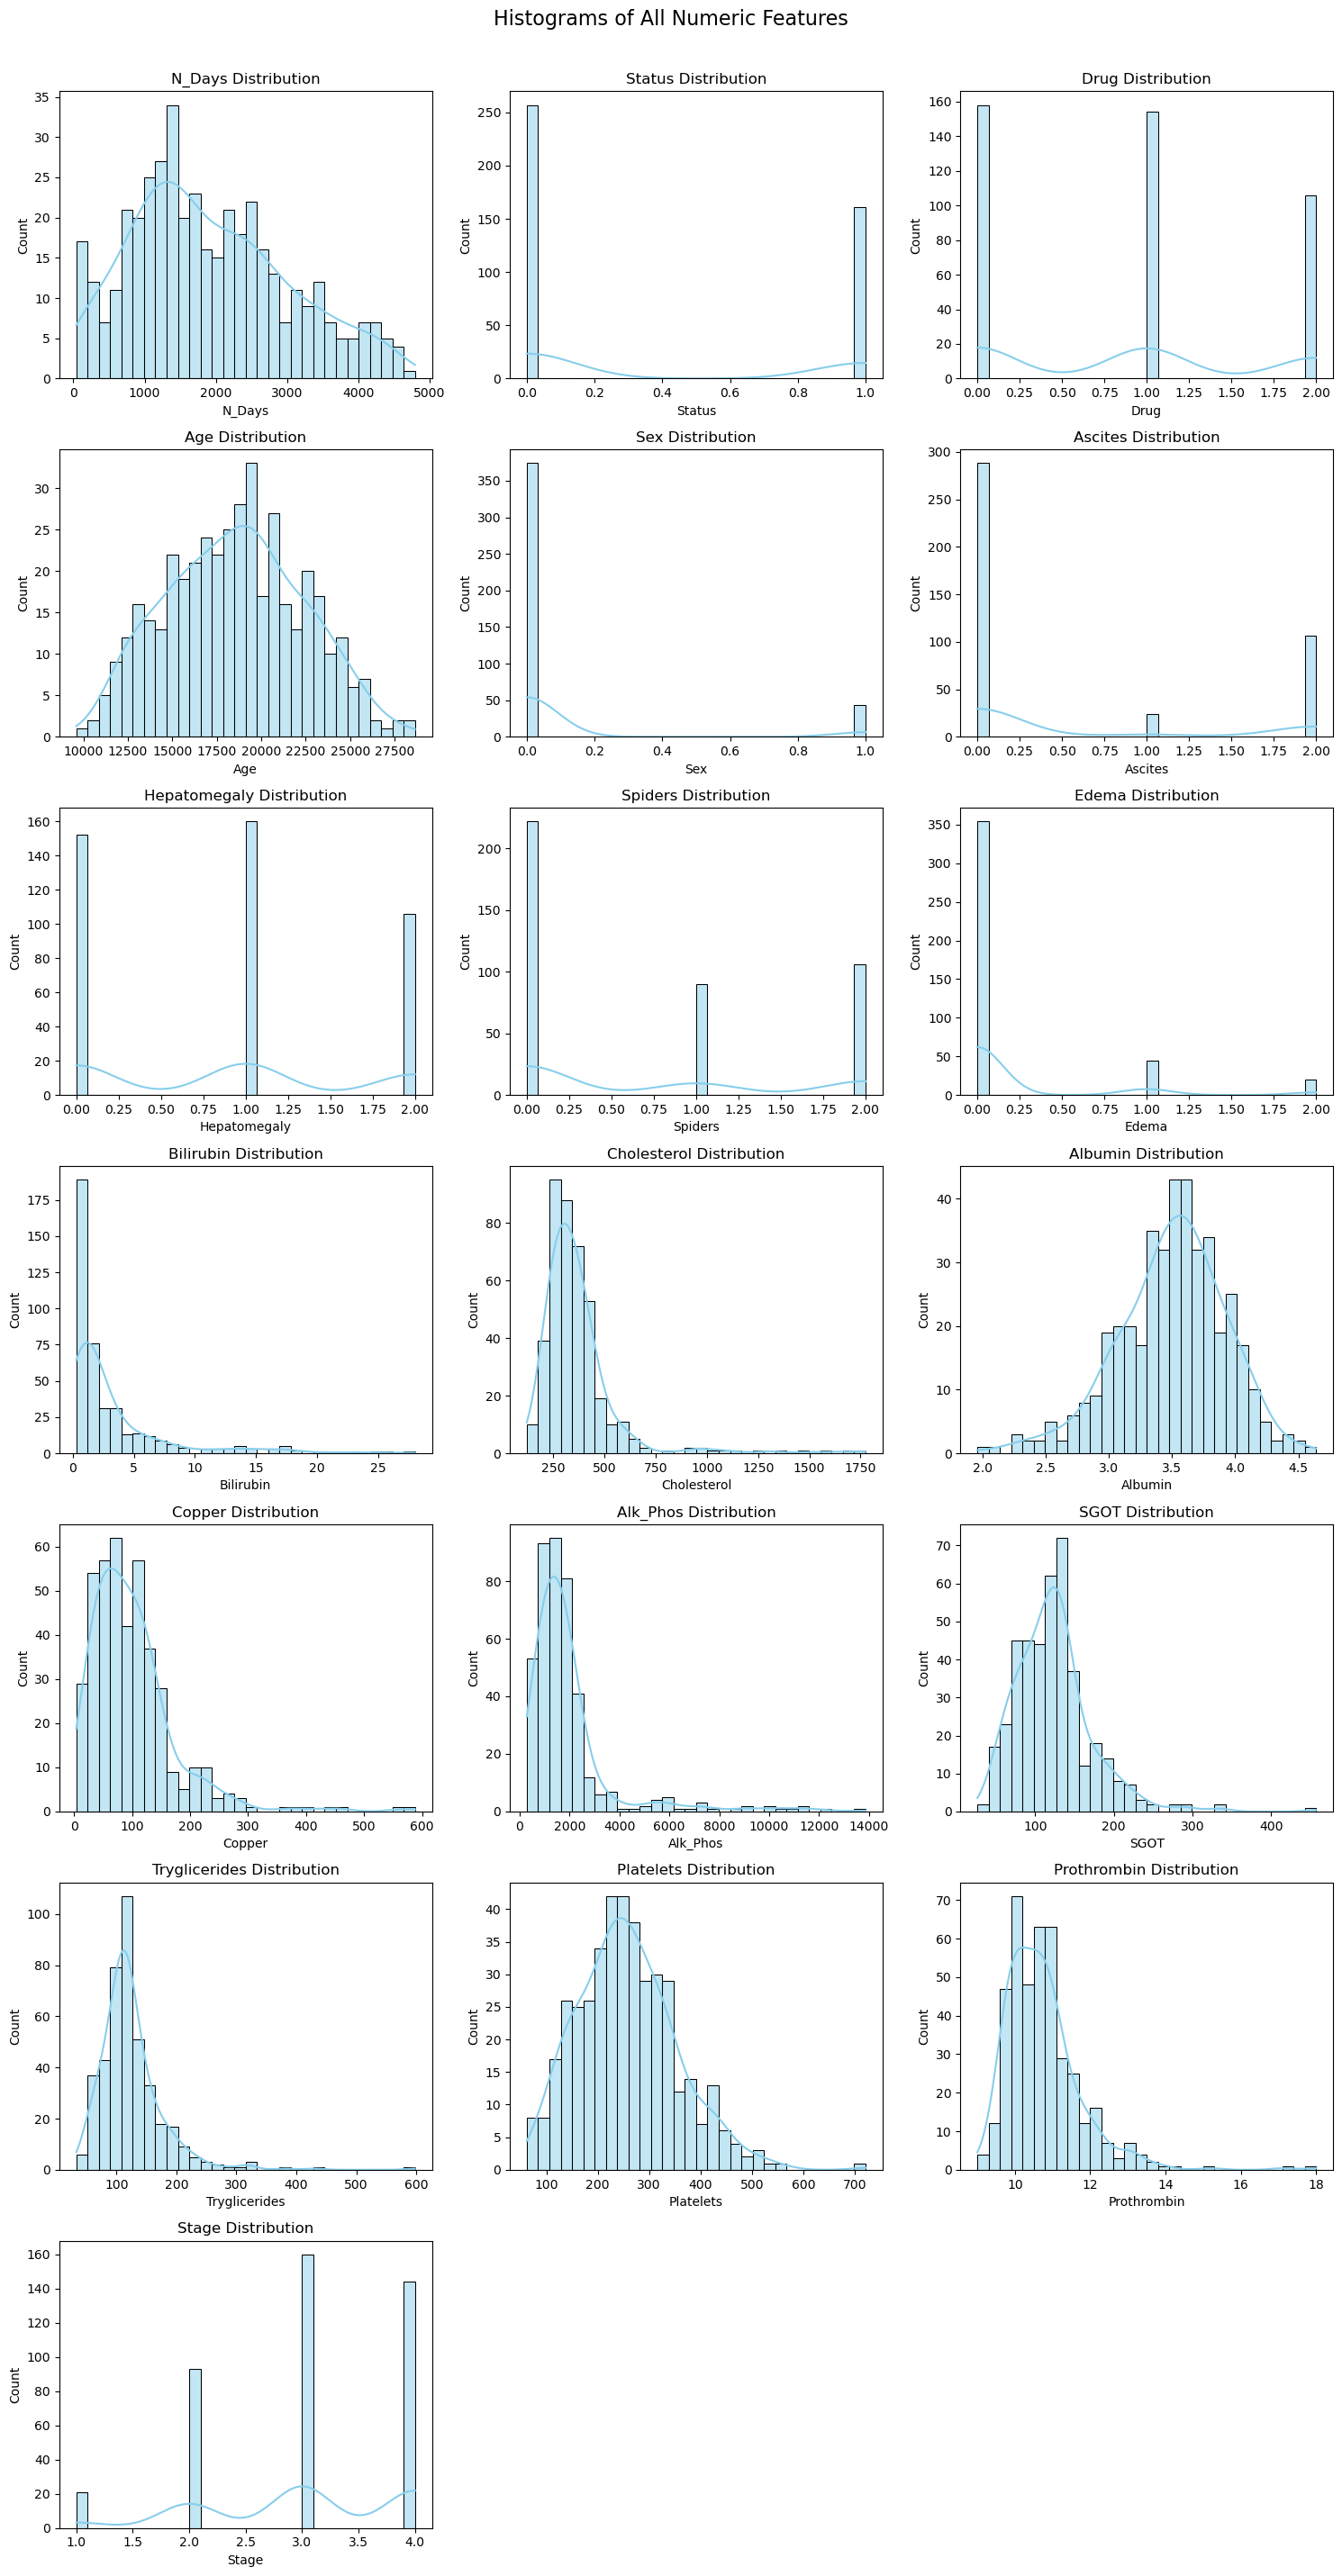

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure all numeric columns
numeric_cols = imputed_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    try:
        sns.histplot(imputed_data[col], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{col} Distribution")
    except Exception as e:
        print(f"Error plotting {col}: {e}")
        axes[i].text(0.5, 0.5, 'Plot Failed', ha='center')
        axes[i].set_title(f"{col} - Error")

# Hide extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of All Numeric Features", fontsize=16, y=1.02)
plt.show()


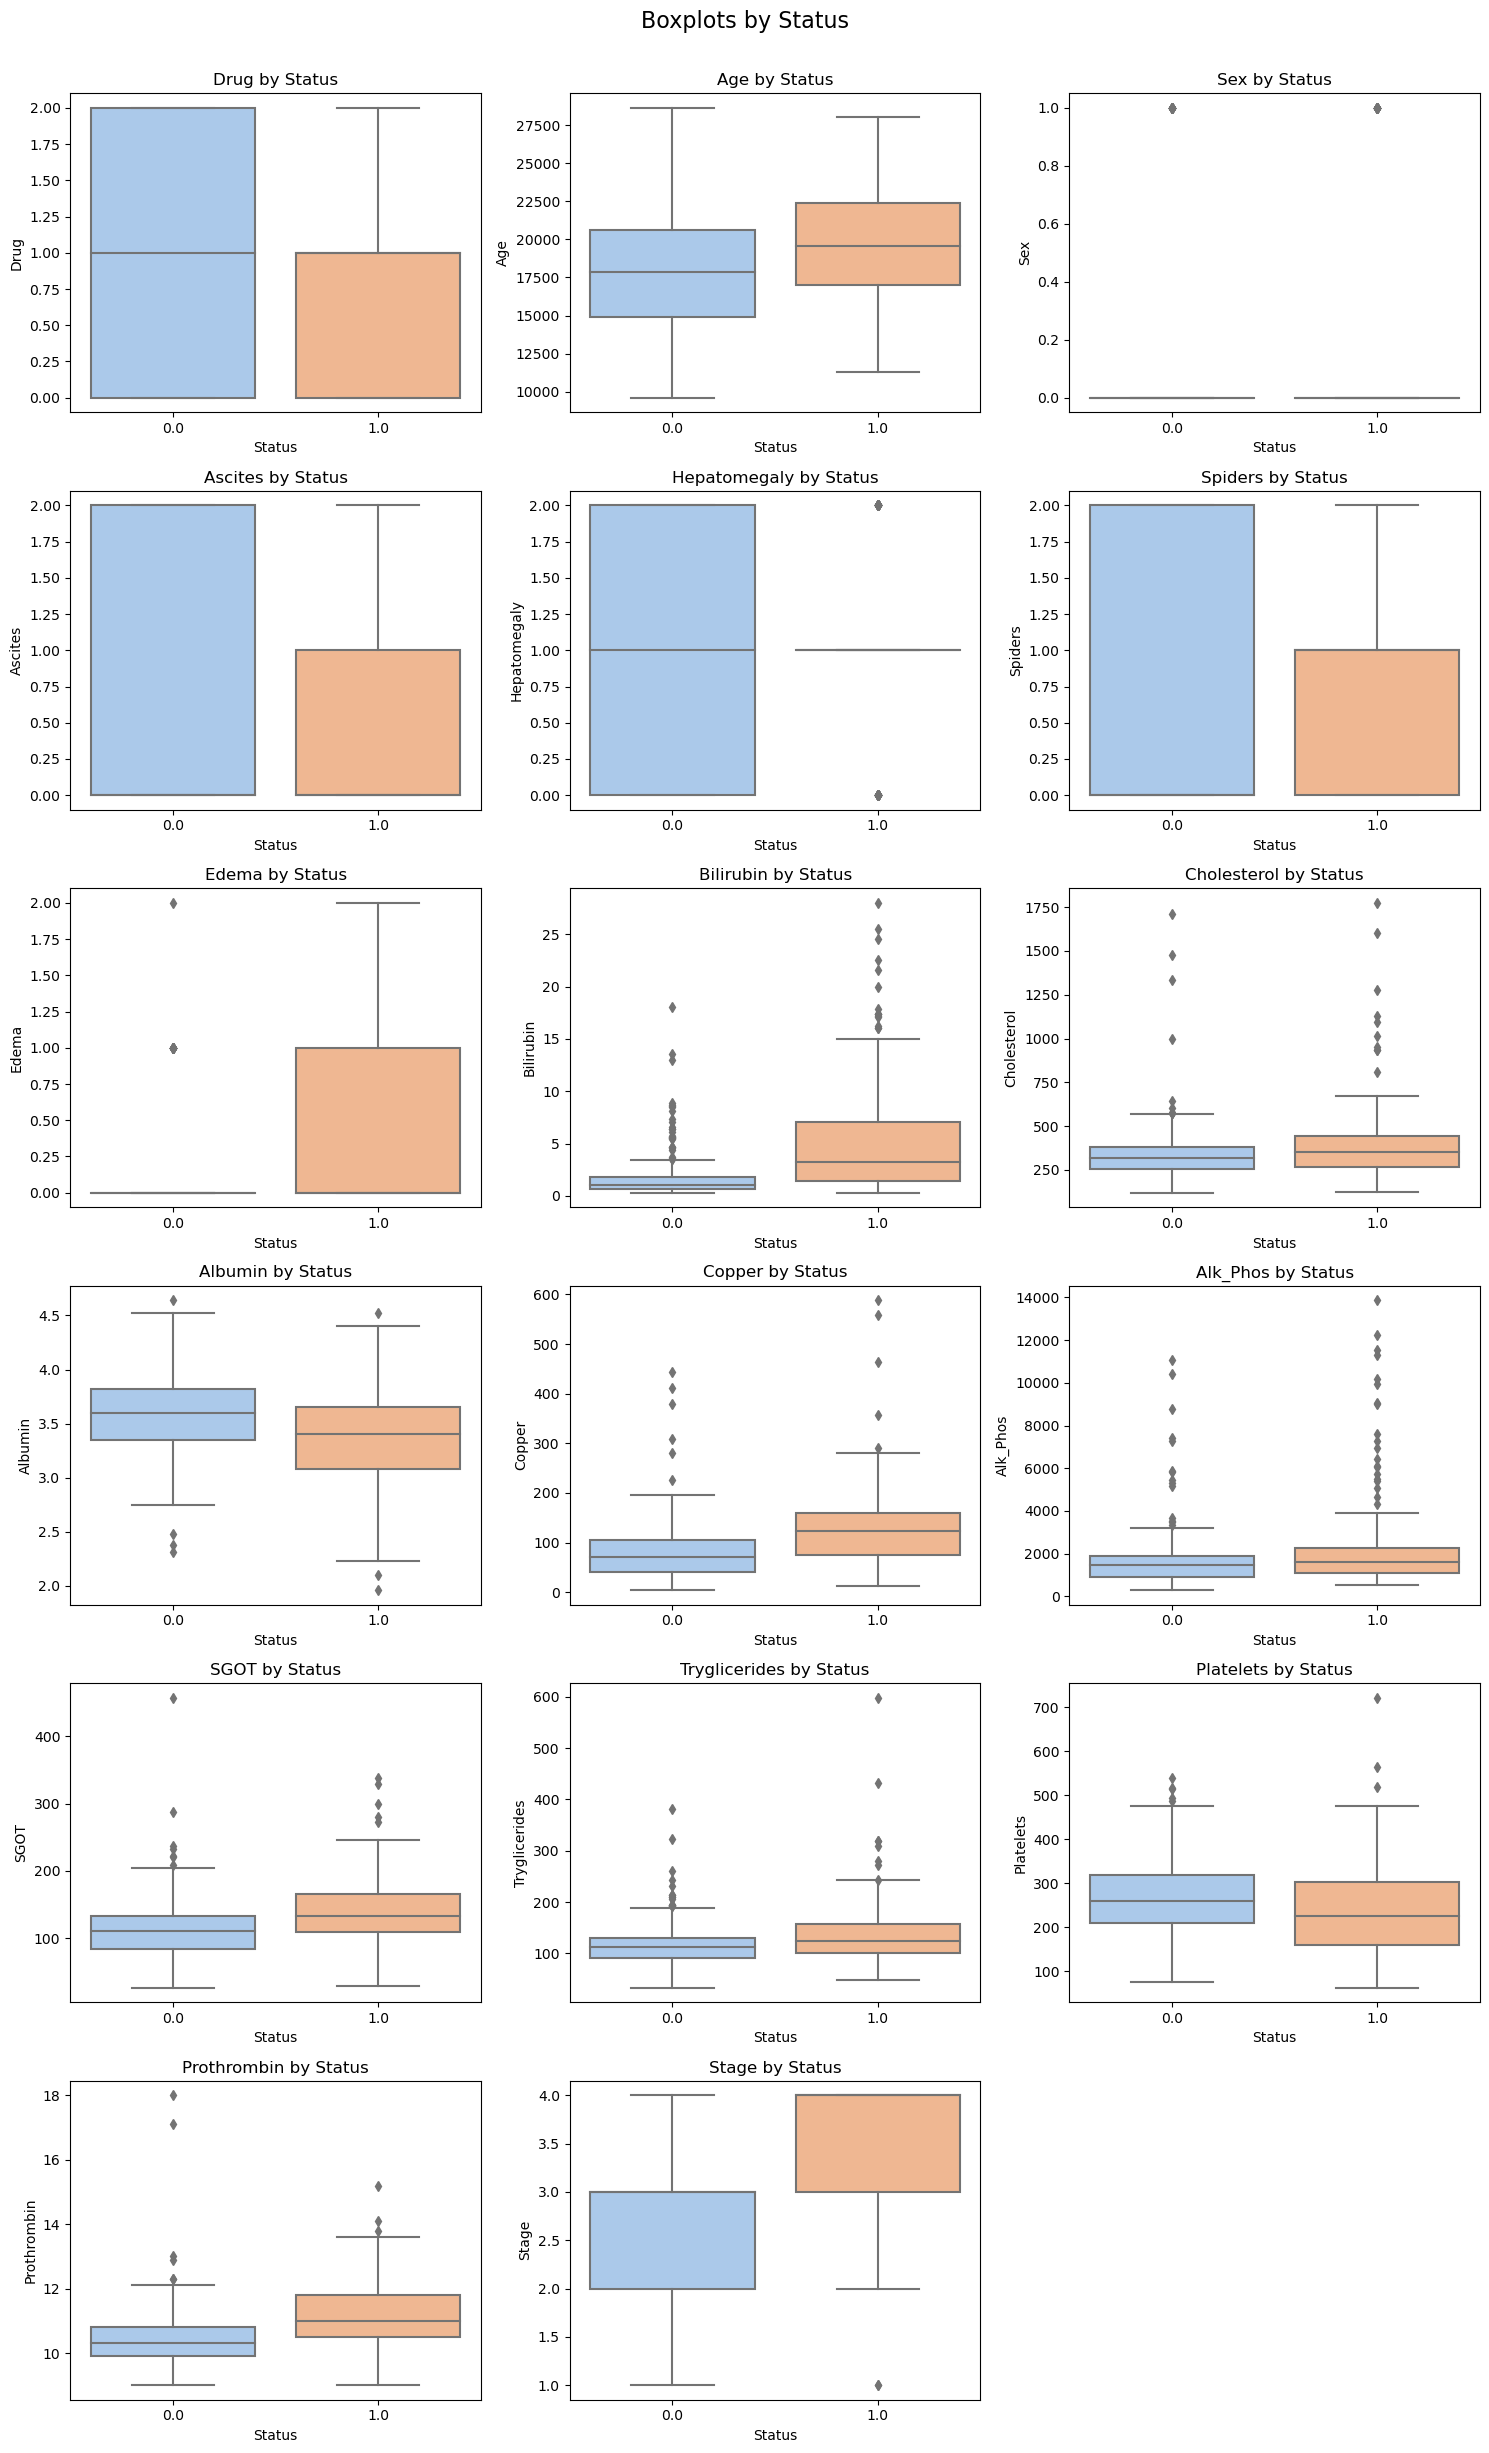

In [50]:
features = [col for col in imputed_data.columns if col not in ['Status', 'N_Days']]
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=imputed_data, x='Status', y=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f"{col} by Status")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Boxplots by Status", fontsize=16, y=1.02)
plt.show()


In [51]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for all numeric columns
z_scores = np.abs(zscore(imputed_data.select_dtypes(include=['float64', 'int64'])))

# Define threshold
threshold = 3

# Create a boolean mask where all z-scores are less than threshold
filtered_entries = (z_scores < threshold).all(axis=1)

# Filter the DataFrame
data_no_outliers = imputed_data[filtered_entries].reset_index(drop=True)

# Compare before/after
print(f"Original shape: {imputed_data.shape}")
print(f"After removing outliers: {data_no_outliers.shape}")


Original shape: (418, 19)
After removing outliers: (352, 19)


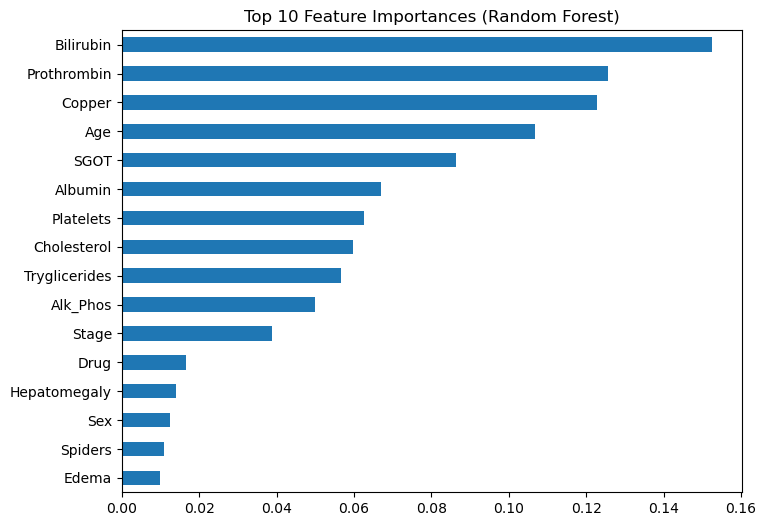

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Split X and y
X = data_no_outliers.drop(columns=['Status', 'N_Days'])
y = data_no_outliers['Status'].astype(int)  # Make sure it's int

# Train random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(16)

# Plot
top_features.plot(kind='barh', title='Top 10 Feature Importances (Random Forest)', figsize=(8,6))
plt.gca().invert_yaxis()
plt.show()


In [53]:
data_no_outliers.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [54]:
cols=['Sex','Spiders', 'Edema','Hepatomegaly']
data_no_outliers.drop(cols,axis=1,inplace=True)

In [55]:
data_no_outliers.shape

(352, 15)

In [56]:
data_no_outliers.head()

,N_Days,Status,Drug,Age,Ascites,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,4500.0,0.0,0.0,20617.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221,10.6,3
1,1012.0,1.0,0.0,25594.0,0.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151,12.0,4
2,1925.0,1.0,0.0,19994.0,0.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183,10.3,4
3,1504.0,0.0,1.0,13918.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136,10.9,3
4,2503.0,1.0,1.0,24201.0,0.0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,231,11.0,3


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features and target
X = data_no_outliers.drop(columns=['Status'])
y = data_no_outliers['Status'].astype(int)  # Ensure it's integer

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create new balanced DataFrame
balanced_data = X_resampled.copy()
balanced_data['Status'] = y_resampled

# Check new class distribution
print("Class distribution after SMOTE:")
print(balanced_data['Status'].value_counts())


Class distribution after SMOTE:
Status
0    240
1    240
Name: count, dtype: int64


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split dataset
X = balanced_data.drop(columns=['Status'])
y = balanced_data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define models with extended parameter grids
models = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__penalty": ['l2'],
            "clf__solver": ['liblinear', 'lbfgs']
        }
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {
            "clf__n_estimators": [50, 100, 150],
            "clf__max_depth": [None, 10, 20, 30],
            "clf__min_samples_split": [2, 5],
            "clf__min_samples_leaf": [1, 2],
        }
    ),
    "SVM": (
        SVC(),
        {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["linear", "rbf", "poly"],
            "clf__gamma": ["scale", "auto"]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "clf__n_neighbors": [3, 5, 7, 9],
            "clf__weights": ['uniform', 'distance'],
            "clf__metric": ['euclidean', 'manhattan']
        }
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(),
        {
            "clf__n_estimators": [50, 100, 150],
            "clf__learning_rate": [0.1, 0.05, 0.01],
            "clf__max_depth": [3, 5, 7],
            "clf__subsample": [1.0, 0.8]
        }
    )
}

# Run GridSearchCV for each model
for model_name, (model, params) in models.items():
    print(f"\n🔍 Training {model_name}...")

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    
    grid = GridSearchCV(
        pipeline,
        param_grid=params,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    
    print(f"✅ Best Parameters: {grid.best_params_}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))



🔍 Training LogisticRegression...
✅ Best Parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
✅ Accuracy: 0.8125
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        48
           1       0.86      0.75      0.80        48

    accuracy                           0.81        96
   macro avg       0.82      0.81      0.81        96
weighted avg       0.82      0.81      0.81        96


🔍 Training RandomForest...
✅ Best Parameters: {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
✅ Accuracy: 0.8021
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.82      0.77      0.80        48

    accuracy                           0.80        96
   macro avg       0.80      0.80      0.80        96
weighted avg       0.80      0.80      0.80